<br>
<h1 align="center">《基于多种方法的衣物分类训练》</h1>
 
<br><br>


 

 



#### 问题
* 1  选择三种你熟悉的分类方法，基于coat 和 t-shirt 训练子数据集，训练三个二分类模型，并分别给出在coat 和 t-shirt 训练集和测试集上的 
`准确率，精度，召回率 和F1得分`，并画出ROC曲线，计算曲线下方面积值。 
* 2  用和问题1同样的分类方法，基于 sandal 和 ankle boot 训练子数据集，训练三个二分类模型， 并分别给出在 sandal 和 ankle boot 训练集和测试集上的  `准确率，精度，召回率 和F1得分`，并画出ROC曲线，计算曲线下方面积值。 
* 3 将训练数据分为 trouser 类和非trouser 类，用同问题1，2 同样的分类方法训练三个二分类模型，在对应的  trouser 类和非trouser 类 测试集上给出这三个二分类器的 `准确率，精度，召回率 和F1得分`，并画出ROC曲线和计算曲线下方面积。 （和1，2不同，该问题是类别不平衡问题）
* 4  选择两种多分类方法，在训练集上训练多分类模型（在本数据集上为10分类），并分别给出在训练集和测试集上的分类`准确率`得分。（说明，对每种分类方法，可以通过网格搜索或随机搜索方法确定模型超参数，此外，在训练分类模型之前，可能要对输入向量做一些预处理，如为提高训练效率，可PCA或其它降维方法降低特征的维输，但有时也可以通过特征组合增添一些新特征，以提高最终的测试得分）
#### 要求：
提交一份jupyter notebook 格式的文档，该文档包含每种分类方法的基本算法原理，代码实现（可以直接使用scikit-learn 库，代码部分至少三分之一要有注释说明），实验结果比较分析，结论，参考资料等。同时，在文档后面应附上每位队成员所做的主要工作（如是算法原理介绍，代码编写，实验分析，改进方案，分类模型优缺点分析等）

提交时间: 2022.6.1前每队负责人将作业发到邮箱，并附上队成员信息（学号，姓名）。

## 1. 文档导读与说明

### 本文档目录结构：
1. **文档导读与说明：** 对本文档做出的一些说明。
2. **问题分析及思路：** 统一分析四个问题，并提出解决问题的`思路`。
3. **基本算法的原理：** 对 SGD、朴素贝叶斯、决策树分类`原理`的阐述。
4. **通用类代码实现：** 调用 scikit-learn 库，`编写通用类`，实现四个问题的统一解决。
5. **对应问题的解决：** `调用编`写的通用类，对四个分类问题训练对应模型，输出模型相关信息。
6. **结果分析与结论：** 综合分析问题，做出相关结论。


### 关于几点说明：

#### 1. 如何阅读本文档？
> 由于文档较长，可读性较差，我队已尽可能规范文档，提高可读性。  
> 如若难以阅读，可参考以下阅读思路：
- 首次阅读请 **`折叠`** 文档，把握文档结构
- 建议阅读一部分折叠一部分
- 也可对应文档目录结构说明进行阅读
- 参看单元格内部详细的注释与说明

##### 2. 为什么将主要源码单独放在一个单元格？

> 分析上述四个问题，可知每个问题对功能的实现高度相似，四个问题的代码重叠度很高。  
> 若按照结构性编程，将四个问题重复的代码分散到不同单元格内，会使得代码冗余、难以阅读、难以维护、难以扩展。  
> 因此采用类封装的思想，编写一个 `通用类`，实现四个问题的统一解决。    

- **我们这样做的优点：**
- 减少代码的 **重复性**，提高代码的 **可读性**，增加功能的 **丰富性**。   
- 编写的 `通用类` 具有可扩展性，针对不同问题可实现不同的细则功能，又能使得整体统一。  



## 2. 问题分析及思路

### 2.1 问题分析  
> 问题1：提取出**标签**为 `t-shirt` 和 `coat` 的子数据集，并进行二分类训练  
> 问题2：提取出**标签**为 `sandal` 和 `ankle boot` 的子数据集，并进行二分类训练  
> 问题3：将整个数据集划分为 `trouser` 和 `非trouser` ，并进行二分类训练  
> 问题4：将整个训练集按照**各自标签**进行分类，即分为10类，进行多分类训练  

- 对于 问题1、问题2，功能需求是等价的，先提取出含有两个指定标签的子数据集，然后根据这两个标签进行二分类。故可编写一个通用类，通过传入两个不同的**标签**，实现二分类，即可解决问题1、问题2。
- 对于 问题3，其与上述两问同属于二分类问题，不同之处在于不用提取子数据集，而是直接对整个数据集进行了不平衡划分。故可在类的内部直接将整个数据集划分成两类标签，即 `trouser`类 和 `非trouser` 类。对数据打上标签后，再通过一二问的类进行二分类训练即可。虽然这种不平衡划分可能会影响分类模型的准确度。
- 对于 问题4，原有数据集就已经将样本打上了10种标签，故我们不需要在对数据集进行处理，直接交付给多分类器训练即可。
- 训练完模型之后，给出对应分类器在训练集、测试集上的 `准确率，精度，召回率 和F1得分`，并画出ROC曲线，计算曲线下方面积值。

### 2.2 解决思路
1. 编写 **`通用模型类 ClassifyModel("label1", "label2")`**，即传入两个分类标签，自动提取出仅含 `label1` 或 `label2` 的子数据集，并打上对应标签。通过调用 *类成员函数* 训练出三种对应的二分类器，并输出模型相关信息。
2. 扩展上述 **`通用模型类`** 为 **`ClassifyModel("label")`**，即传入一个标签时，对数据集进行不平衡划分，整合划分为 `label` 和 `非 label` 两类数据，并打上对应标签。然后与上一步相同，调用 *类成员函数* 训练出三种对应的二分类器，并输出模型相关信息。
3. 以上均基于二分类，再次扩展 **`通用模型类`** 为 **`ClassifyModel(classNums=10)`**，即分类种数 (classNums) 为 **10** 类。同样，通过调用 *类成员函数* 训练出三种对应的多分类器，并输出模型相关信息。

### 2.3 应用举例
- 例如我们下面实现的 `ClassifyModel` 类，
- 实例化对象 `ClassifyModel("coat","t-shirt")` 即可训练三种二分类模型，实现问题1的需求。
- 实例化对象 `ClassifyModel("sandal","ankle boot")` 即可训练三种二分类模型，实现问题2的需求。
- 实例化对象 `ClassifyModel("trouser")` 即可训练三种关于不平衡分类的二分类模型，实现问题3的需求。
- 实例化对象 `ClassifyModel(classNums=10)` 即可训练三种多分类模型，实现问题4的需求。


## 3. 算法的基本原理

### 3.1 随机梯度下降

在深度学习里，目标函数通常是训练数据集中有关各个样本的损失函数的平均。设 *$f_{i}(x)$* 是有关索引为 $i$ 的训练数据样本的损失函数, $n$ 是训练数据样本数, $x$ 是模型的参数向量，那么目标函数定义为

$f(x) = \frac{1}{n} \sum_{i=1}^{n} f_{i}(x)$

目标函数在$x$处的梯度计算为

$\nabla f(x) = \frac{1}{n} \sum_{i=1}^{n} \nabla f_{i}(x)$

如果使用梯度下降，每次自变量迭代的计算开销为$O$($n$),它随着$n$线性增长。因此，当训练数据样本数很大时，梯度下降每次迭代的计算开销很高。

随机梯度下降（stochastic gradient descent，SGD）减少了每次迭代的计算开销。在随机梯度下降的每次迭代中，我们随机均匀采样的一个样本索引$i$ ∈ { 1 , … , n } ,并计算梯度$\nabla f_{i}(x)$来迭代$x$:

$x \leftarrow x - \eta \nabla f_{i}(x)$

这里$\eta$同样是学习率。可以看到每次迭代的计算开销从梯度下降的$O(n)$降到了常数$O(1)$。值得强调的是，随机梯度$\nabla f_{i}(x)$是对梯度$\nabla f(x)$的无偏估计：

$E_{i} \nabla f_{i}(x) = \frac{1}{n}  \sum_{i=1}^{n} \nabla f_{i}(x) = \nabla f(x)$

这意味着，平均来说，随机梯度是对梯度的一个良好的估计

### 3.2 朴素贝叶斯分类

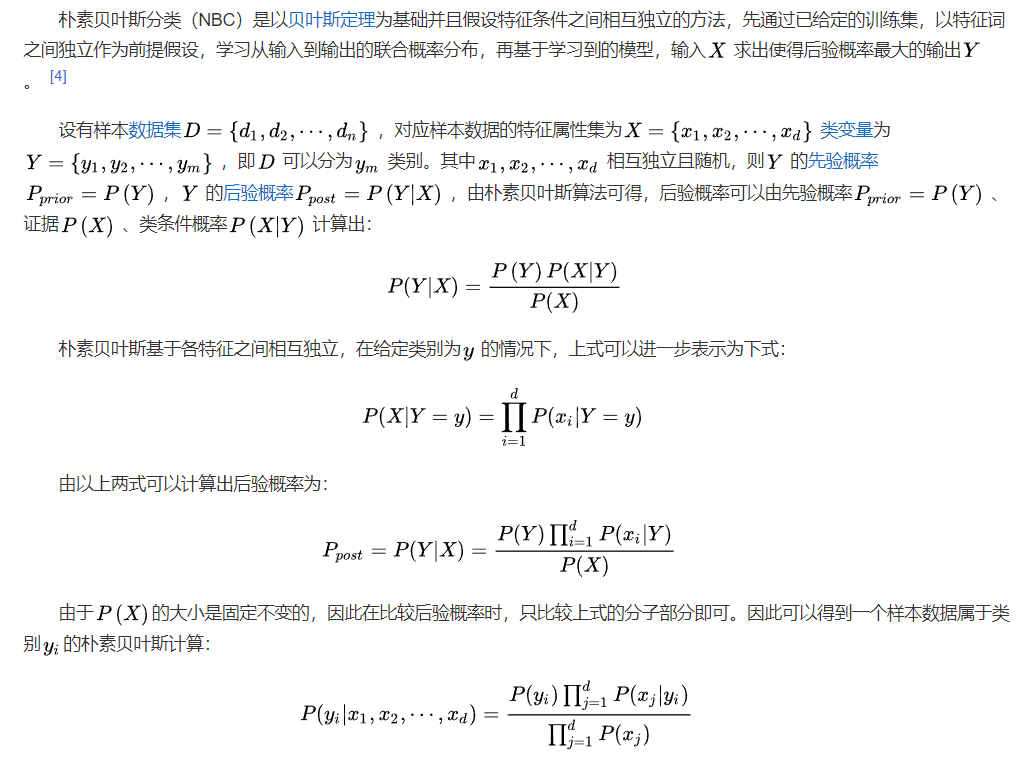

In [69]:
from IPython.display import Image
Image(filename = 'theory/bayes.png', width=700, height=600)

### 3.3 决策树分类

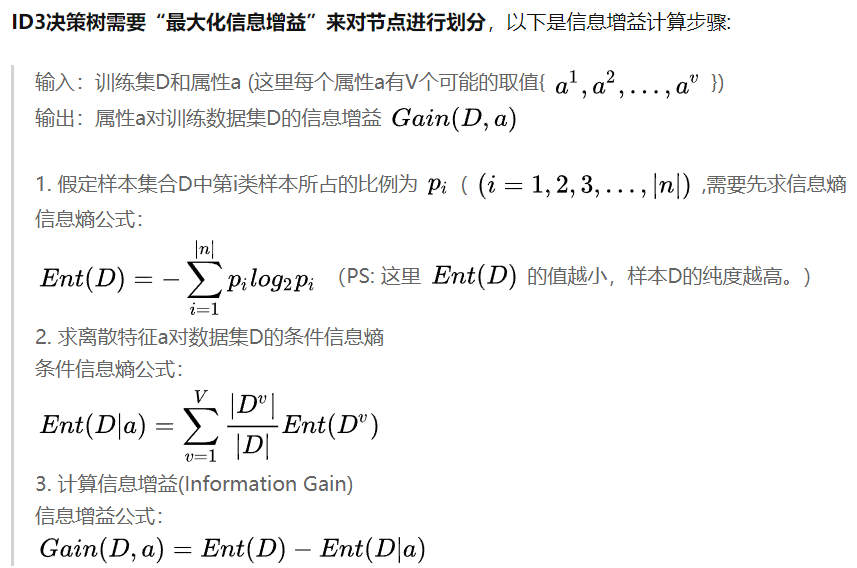

In [70]:
Image(filename = 'theory/tree_1.png', width=700, height=600)

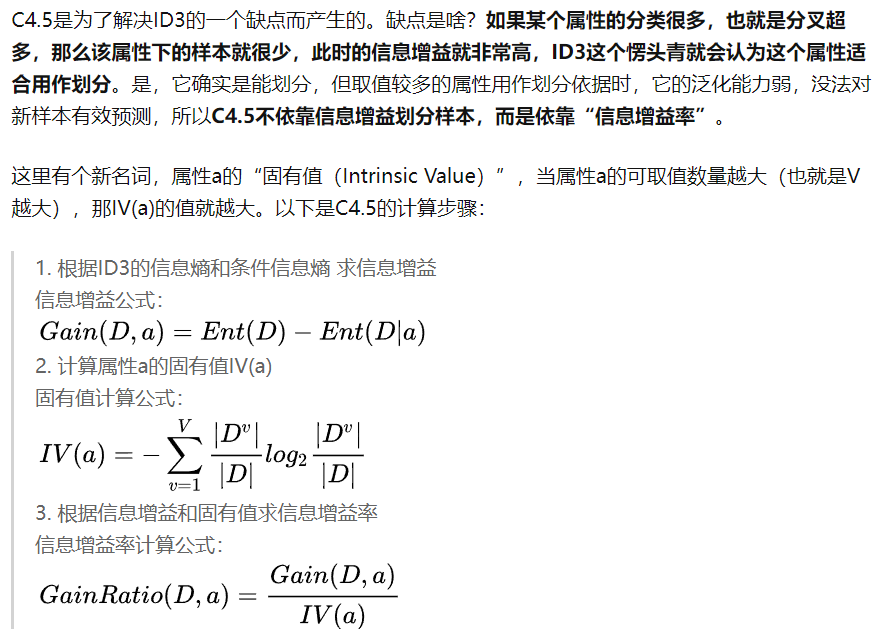

In [71]:
Image(filename = 'theory/tree_2.png', width=700, height=600)

## 4. 通用类代码实现

### 4.1 通用类的功能说明
1. 编写 **`通用模型类 ClassifyModel("label1", "label2")`**，即传入两个分类标签，自动提取出仅含 `label1` 或 `label2` 的子数据集，并打上对应标签。通过调用 *类成员函数* 训练出三种对应的二分类器，并输出模型相关信息。
2. 扩展上述 **`通用模型类`** 为 **`ClassifyModel("label")`**，即传入一个标签时，对数据集进行不平衡划分，整合划分为 `label` 和 `非 label` 两类数据，并打上对应标签。然后与上一步相同，调用 *类成员函数* 训练出三种对应的二分类器，并输出模型相关信息。
3. 以上均基于二分类，再次扩展 **`通用模型类`** 为 **`ClassifyModel(classNums=10)`**，即分类种数 (classNums) 为 **10** 类。同样，通过调用 *类成员函数* 训练出三种对应的多分类器，并输出模型相关信息。

### 4.2 通用类的应用举例
- 例如我们下面实现的 `ClassifyModel` 类，
- 实例化对象 `ClassifyModel("coat","t-shirt")` 即可训练三种二分类模型，实现问题1的需求。
- 实例化对象 `ClassifyModel("sandal","ankle boot")` 即可训练三种二分类模型，实现问题2的需求。
- 实例化对象 `ClassifyModel("trouser")` 即可训练三种关于不平衡分类的二分类模型，实现问题3的需求。
- 实例化对象 `ClassifyModel(classNums=10)` 即可训练三种多分类模型，实现问题4的需求。


### 4.3 通用类的代码编写

In [72]:
# 通用类的代码实现
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

# 导入待训练的数据集
data = np.load(r'data/Fashion-MNIST.npz')
X_TRAIN = data['arr_0']
Y_TRAIN = data['arr_1']
X_TESTS = data['arr_2']
Y_TESTS = data['arr_3']


class ClassifyModel:
    """ `三合一二分类模型`
        此类聚合了：   
        - sgd分类模型
        - 朴素贝叶斯分类
        - 决策树分类模型 
        ### @API属性
        - 训练集：x_train
        - 测试集：x_tests
        - sgd分类器：sgd
        - 朴素贝叶斯：bayes
        - 决策树分类器：tree
    """
    # 数据集中 y 的数字标签为 [0,1,2 ··· ,9] 
    # 为方便观察，可以映射为以下的文本标签
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot', '---']

    def __init__(self, *args, classnums=2, loadModel=False):
        """ 参数 *args： 若传入一个文本标签，即可实现不平衡二分类
            参数 *args： 若传入两个文本标签，即可实现两个标签的二分类
            参数 classnums=2：默认为 2 分类，若指定为 10 即可十分类
            参数 loadModel：是否加载先前训练好的模型
        """
        self.loadModel = loadModel

        # 对应二分类问题，则根据args长度判断是否为不平衡划分
        if classnums == 2:
            if len(args) == 1:  # 针对问题3
                self.__imbalanDivide(args)
            if len(args) == 2:  # 针对问题1，问题2
                self.__balanceDivide(args)

        # 对应问题四的多分类问题
        if classnums == 10:
            self.x_train, self.y_train = X_TRAIN, Y_TRAIN
            self.x_tests, self.y_tests = X_TESTS, Y_TESTS
            
        # 基于以上数据训练模型
        self.classify()

    def __imbalanDivide(self, args):
        """ 对样本进行不平衡划分
            即把样本空间中划分 A类 与 非A类
        """
        clas = self.labels.index(args[0]) # 获得输入衣物类别的索引
        self.x_train, self.x_tests = X_TRAIN, X_TESTS

        # 给A类打上 clas 数字标签 ，给非A类打上 -1 数字标签
        self.y_train = np.where(Y_TRAIN==clas, clas, -1)
        self.y_tests = np.where(Y_TESTS==clas, clas, -1)

    def __balanceDivide(self, args):
        """ 此方法将从训练集中划分出 clas1，clas2
            自动提取数据集 label1、label2  
            如从样本空间提取出 t-shirt、coat
        """
        self.clas1 = self.labels.index(args[0])
        self.clas2 = self.labels.index(args[1])

        # 提取出含有编号 clas1 和 clas2 的训练集、测试集
        self.x_train, self.y_train = self.__extractData("train")
        self.x_tests, self.y_tests = self.__extractData("test")

    # 从总体数据集中提取出指定数据集
    def __extractData(self, model="train"):
        if model == "train": 
            x, y, size = X_TRAIN, Y_TRAIN, 12000
        if model == "test" :
            x, y, size = X_TESTS, Y_TESTS,  2000
        j = 0
        xtrain = np.zeros((size, 28*28), dtype=np.float32)
        ytrain = np.zeros((size, ), dtype=int)
        for i in range(y.shape[0]):#遍历数据集获得指定数据集
            if y[i]==self.clas1 or y[i]==self.clas2:
                xtrain[j], ytrain[j] = x[i], y[i]
                j += 1
        return xtrain, ytrain

    def classify(self):
        """ 核心部分，训练分类模型 """
        time0 = time.time()

        # 尝试加载已经训练好的模型，否则重新训练模型
        if(self.loadModel):
            import joblib
            try:
                self.sgd   = joblib.load('model/sgd.model')
                self.bayes = joblib.load('model/bayes.model')
                self.tree  = joblib.load('model/tree.model')
            except:
                print("找不到已训练的分类器")
        else:
            # SGD 分类器
            self.sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
            self.sgd.fit(self.x_train, self.y_train)
            time1 = time.time()

            # 朴素贝叶斯分类器
            self.bayes = GaussianNB()
            self.bayes.fit(self.x_train, self.y_train)
            time2 = time.time()

            # 决策树分类器
            self.tree = tree.DecisionTreeClassifier()
            self.tree.fit(self.x_train, self.y_train)
            time3 = time.time()

            taketime1 = round((time1 - time0))
            taketime2 = round((time2 - time1))
            taketime3 = round((time3 - time2))
            print(f"\n-> SGD 分类器训练耗时:   \t{taketime1*10**3} 毫秒")
            print(f"\n-> 朴素贝叶斯 训练耗时:  \t{taketime2*10**3} 毫秒")
            print(f"\n-> 决策树分类器 训练耗时:\t{taketime3*10**3} 毫秒")


    def get_classify_labels(self, num_labels): 
        ''' 返回数字编号对应的数据集⽂本标签 '''
        return self.labels[int(num_labels)]

    def showHeadSample(self, sample=None, rows=10, cols=5):
        ''' 展示数据集的前五十个样本 '''
        if sample is None: sample = self.x_train

        plt.figure(figsize=(rows, cols))
        for i in range(rows*cols):
            plt.subplot(cols, rows, i+1)
            image = sample[i].reshape(28,28)
            plt.imshow(image, cmap="binary", interpolation="nearest")
            plt.axis("off")
            plt.title(self.y_train[i])
        
        plt.tight_layout()
        plt.show()

    def showHeadPredict(self, classmod, rows=10, cols=5):
        ''' 基于训练模型展示部分预测结果 '''

        plt.figure(figsize=(rows, cols))
        for i in range(rows*cols):
            plt.subplot(cols, rows, i+1)
            image = self.x_tests[i].reshape(28,28)
            plt.imshow(image, cmap="binary", interpolation="nearest")
            plt.axis("off")
            title = self.get_classify_labels(classmod.predict(self.x_tests[[i]])[0])
            plt.title(title)
        plt.tight_layout()
        plt.show()

    def crosValScore(self):
        ''' 通过交叉验证输出 (模型1，模型2，模型3) 的准确率 '''

        from sklearn.model_selection import cross_val_score
        sgd_score   = cross_val_score(self.sgd,   self.x_train, self.y_train, cv=3, scoring="accuracy")
        bayes_score = cross_val_score(self.bayes, self.x_train, self.y_train, cv=3, scoring="accuracy")
        tree_score  = cross_val_score(self.tree,  self.x_train, self.y_train, cv=3, scoring="accuracy")

        print("sgd分类器：",        sgd_score)
        print("朴素贝叶斯分类器：", bayes_score)
        print("决策树分类器：",     tree_score)


    def modelScore(self):
        '''计算三种模型的混淆矩阵并进行评估'''
        from sklearn.model_selection import cross_val_predict
        y_pred_m1 = cross_val_predict(self.sgd, self.x_tests,  self.y_tests, cv=3) 
        y_pred_m2 = cross_val_predict(self.bayes, self.x_tests,self.y_tests, cv=3)
        y_pred_m3 = cross_val_predict(self.tree, self.x_tests, self.y_tests, cv=3)

        # 混淆矩阵
        from sklearn.metrics import confusion_matrix
        cm_m1 = confusion_matrix(self.y_tests, y_pred_m1)
        cm_m2 = confusion_matrix(self.y_tests, y_pred_m2)
        cm_m3 = confusion_matrix(self.y_tests, y_pred_m3)

        print("\nSDG分类器：")
        ClassifyModel.printScore(cm_m1)
        print("\n朴素贝叶斯：")
        ClassifyModel.printScore(cm_m2)
        print("\n决策树分类：")
        ClassifyModel.printScore(cm_m3)
        
    def printScore(cm):
        '''打印分类模型得分'''
        TP, FP, FN, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

        accurate =(TP+TN) / (TP+TN+FP+FN)       # 准确率
        precision= TP / (TP+FP)                 # 精准率
        recall   = TP / (TP+FN)                 # 召回率
        f1       = 2  / (1/precision + 1/recall)# F1

        print("准确率: {:.6f}".format(accurate))
        print("精准率: {:.6f}".format(precision))
        print("召回率: {:.6f}".format(recall))
        print("F1:    {:.6f}".format(f1))

        return accurate, precision, recall, f1

    def drawROC(self):
        '''绘制ROC曲线并计算曲线下方面积'''
        from sklearn import metrics
        ax = plt.gca()
        metrics.plot_roc_curve(self.sgd,  self.x_tests, self.y_tests, ax=ax)
        metrics.plot_roc_curve(self.bayes,self.x_tests, self.y_tests, ax=ax)
        metrics.plot_roc_curve(self.tree, self.x_tests, self.y_tests, ax=ax)
        plt.show()

## 5.1 基于 `coat` 和 `t-shirt` 子数据集训练


* 训练基于 `coat`和`t-shirt`的模型（sgd，bayes，tree）

In [73]:
mode_1 = ClassifyModel("coat","t-shirt")


-> SGD 分类器训练耗时:   	1000 毫秒

-> 朴素贝叶斯 训练耗时:  	0 毫秒

-> 决策树分类器 训练耗时:	8000 毫秒


* 基于训练模型展示三种分类方式预测结果

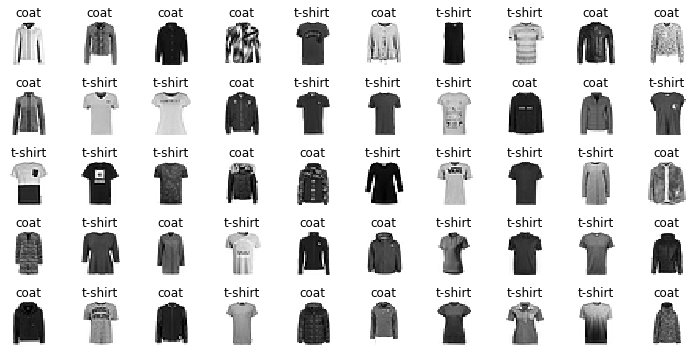

In [74]:
mode_1.showHeadPredict(mode_1.sgd)#sgd分类器

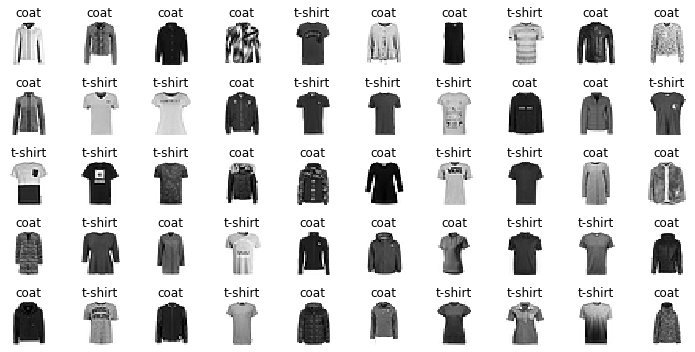

In [75]:
mode_1.showHeadPredict(mode_1.bayes)#朴素贝叶斯分类器

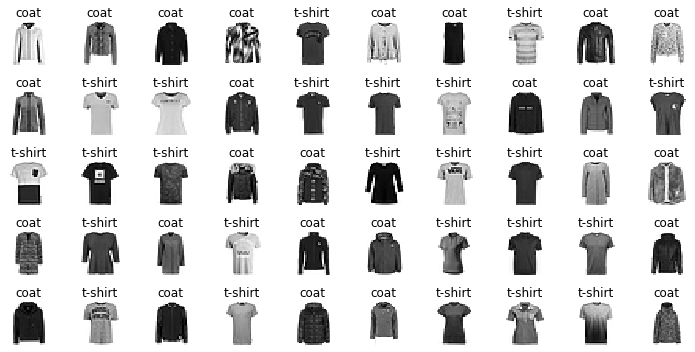

In [76]:
mode_1.showHeadPredict(mode_1.tree)#决策树分类器

* 对训练模型进行模型评估并绘制ROC曲线


SDG分类器：
准确率: 0.969500
精准率: 0.950000
召回率: 0.988554
F1:    0.968893

朴素贝叶斯：
准确率: 0.872000
精准率: 0.788000
召回率: 0.947115
F1:    0.860262

决策树分类：
准确率: 0.952000
精准率: 0.945000
召回率: 0.958418
F1:    0.951662


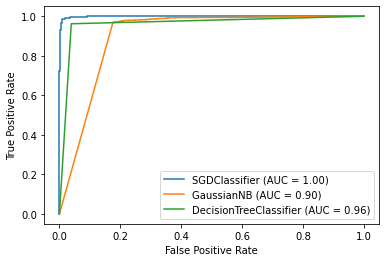

In [77]:
mode_1.modelScore()#计算三种模型的混淆矩阵并进行评估
mode_1.drawROC()#绘制ROC曲线并计算面积

## 5.2 基于 `sandal` 和 `ankle boot` 子数据集训练

* 训练基于 `sandal`和`ankle boot`的模型（sgd，bayes，tree）

In [78]:
mode_2 = ClassifyModel("sandal","ankle boot")


-> SGD 分类器训练耗时:   	2000 毫秒

-> 朴素贝叶斯 训练耗时:  	0 毫秒

-> 决策树分类器 训练耗时:	7000 毫秒


* 基于训练模型展示三种分类方式预测结果

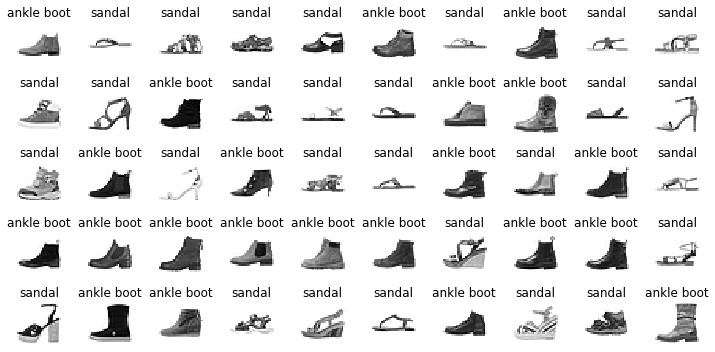

In [79]:
mode_2.showHeadPredict(mode_2.sgd)#sgd分类器

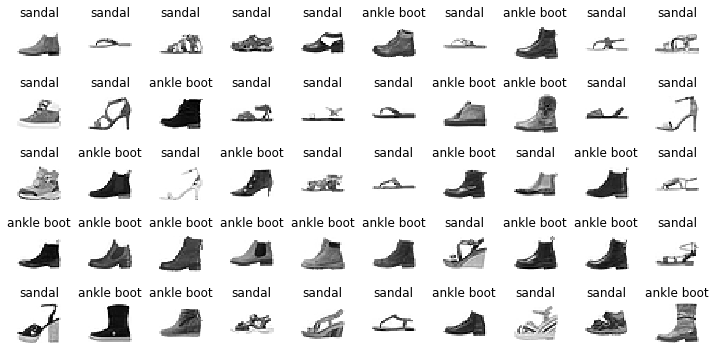

In [80]:
mode_2.showHeadPredict(mode_2.bayes)#朴素贝叶斯分类器

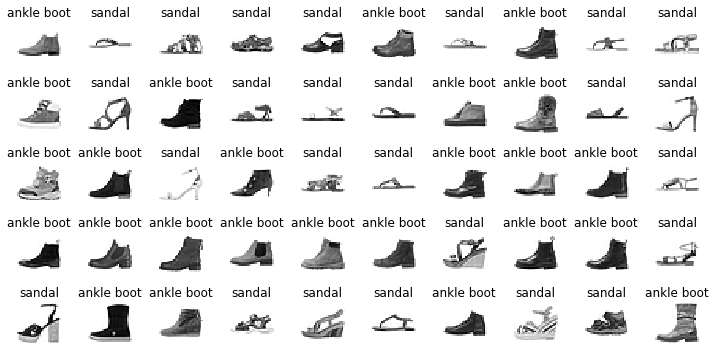

In [81]:
mode_2.showHeadPredict(mode_2.tree)#决策树分类

* 对训练模型进行模型评估并绘制ROC曲线


SDG分类器：
准确率: 0.957500
精准率: 0.968000
召回率: 0.948090
F1:    0.957942

朴素贝叶斯：
准确率: 0.821500
精准率: 0.963000
召回率: 0.750585
F1:    0.843627

决策树分类：
准确率: 0.931000
精准率: 0.917000
召回率: 0.943416
F1:    0.930020


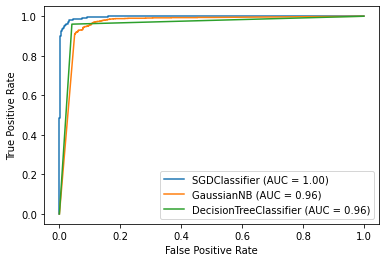

In [82]:
mode_2.modelScore()
mode_2.drawROC()

## 5.3 基于 `trouser` 和 `非trouser` 不平衡分类训练

* 训练基于 `trouser`和`非trouser`的模型（sgd，bayes，tree）

In [83]:
mode_3 = ClassifyModel("trouser")


-> SGD 分类器训练耗时:   	3000 毫秒

-> 朴素贝叶斯 训练耗时:  	1000 毫秒

-> 决策树分类器 训练耗时:	45000 毫秒


* 基于训练模型展示三种分类方式预测结果


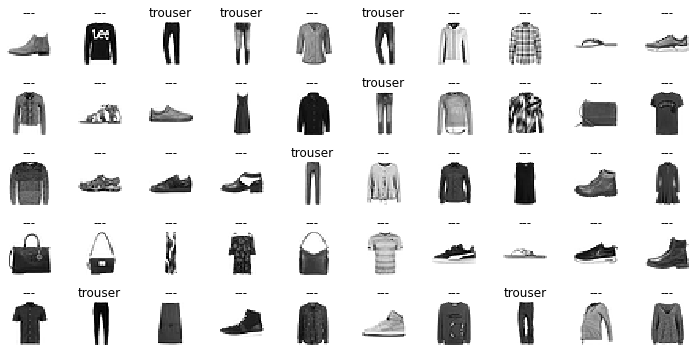

In [84]:
mode_3.showHeadPredict(mode_3.sgd)#sgd分类器

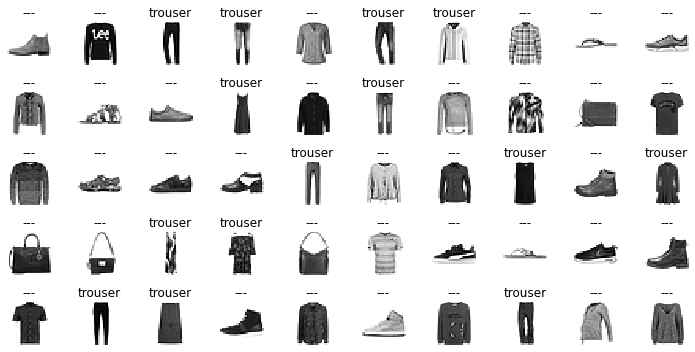

In [85]:
mode_3.showHeadPredict(mode_3.bayes)#朴素贝叶斯分类器

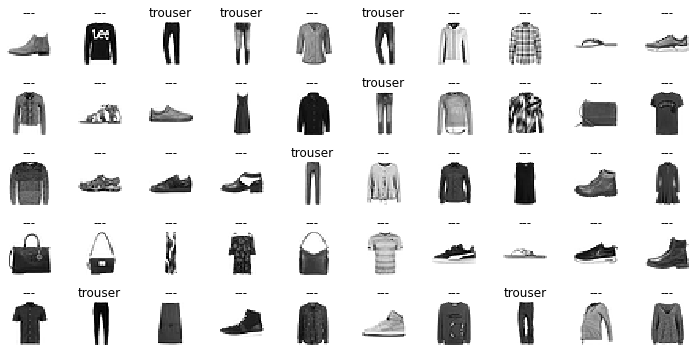

In [86]:
mode_3.showHeadPredict(mode_3.tree)#决策树分类器

* 对训练模型进行模型评估并绘制ROC曲线


SDG分类器：
准确率: 0.988700
精准率: 0.991556
召回率: 0.995871
F1:    0.993709

朴素贝叶斯：
准确率: 0.828600
精准率: 0.812444
召回率: 0.996457
F1:    0.895091

决策树分类：
准确率: 0.978900
精准率: 0.987222
召回率: 0.989311
F1:    0.988265


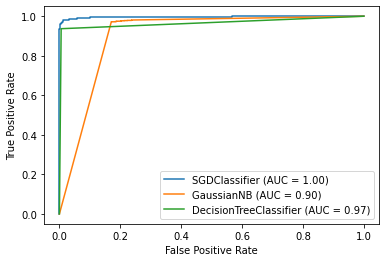

In [87]:
mode_3.modelScore()
mode_3.drawROC()

## 5.4 基于 `完整训练集` 进行多分类训练

* 训练多分类模型

In [88]:
mode_4 = ClassifyModel(classnums=10)


-> SGD 分类器训练耗时:   	33000 毫秒

-> 朴素贝叶斯 训练耗时:  	1000 毫秒

-> 决策树分类器 训练耗时:	48000 毫秒


* 基于训练模型展示三种分类方式预测结果

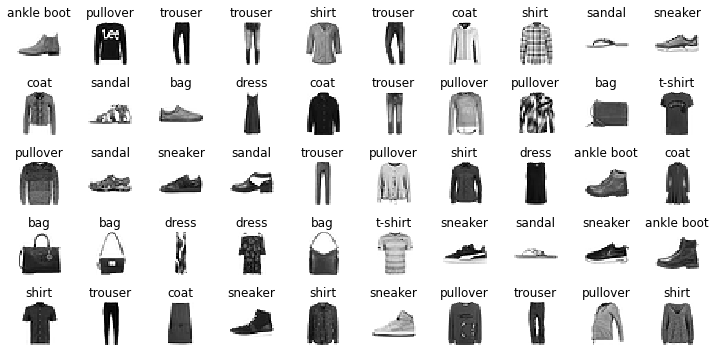

In [89]:
mode_4.showHeadPredict(mode_4.sgd)#sgd分类器

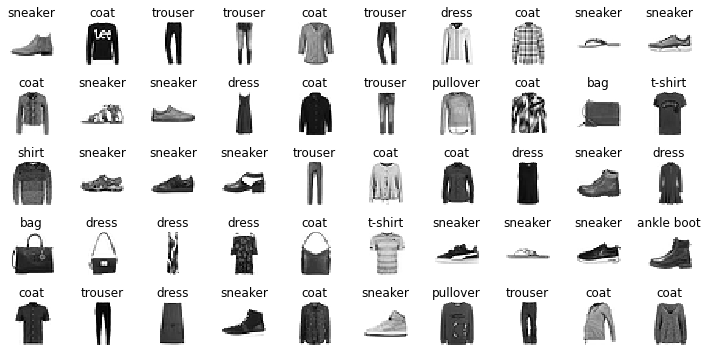

In [90]:
mode_4.showHeadPredict(mode_4.bayes)#朴素贝叶斯分类器

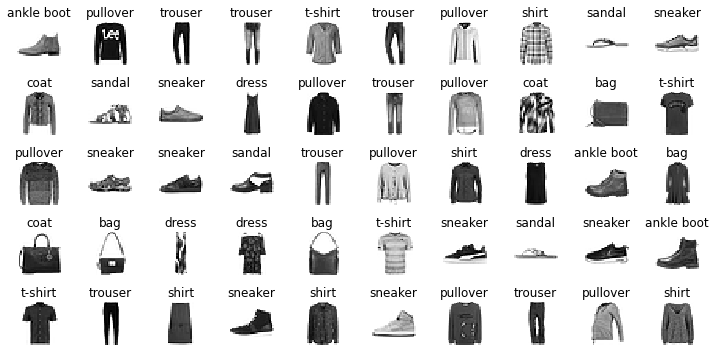

In [91]:
mode_4.showHeadPredict(mode_4.tree)

* 对训练模型进行模型评估并绘制ROC曲线

In [92]:
mode_4.modelScore()


SDG分类器：
准确率: 0.995700
精准率: 0.995601
召回率: 0.994143
F1:    0.994872

朴素贝叶斯：
准确率: 0.956969
精准率: 0.894569
召回率: 0.998217
F1:    0.943555

决策树分类：
准确率: 0.992714
精准率: 0.988780
召回率: 0.994358
F1:    0.991561


## 6. 结果分析与结论

### 6.1 对模型训练的时间分析

> **基于 `t-shirt` `coat` 的二分类**   
> SGD 分类器训练耗时:   	1000 毫秒   
> 朴素贝叶斯 训练耗时:  	0 毫秒   
> 决策树分类器 训练耗时:	8000 毫秒   
  
> **基于 `sandal` `---`  的二分类**   
> SGD 分类器训练耗时:   	2000 毫秒   
> 朴素贝叶斯 训练耗时:  	0 毫秒   
> 决策树分类器 训练耗时:	7000 毫秒   

> **基于 `trousers` 和 `非 trousers` 的不平衡二分类**   
> SGD 分类器训练耗时:   	3000 毫秒   
> 朴素贝叶斯 训练耗时:  	1000 毫秒   
> 决策树分类器 训练耗时:	45000 毫秒   

> **对完整数据集的 `10 分类`**   
> SGD 分类器训练耗时:   	33000 毫秒   
> 朴素贝叶斯 训练耗时:  	1000 毫秒   
> 决策树分类器 训练耗时:	48000 毫秒   

- 由模型训练时间来看，朴素贝叶斯分类的模型训练速度最高远远高于其他两个训练方法，其次是随机梯度下降，决策树的模型训练时间是最长的

### 6.2 对模型训练的效果分析

> SDG分类器：
> 准确率: 0.957500
> 精准率: 0.968000
> 召回率: 0.948090
> F1:    0.957942
> 
> 朴素贝叶斯：
> 准确率: 0.821500
> 精准率: 0.963000
> 召回率: 0.750585
> F1:    0.843627
> 
> 决策树分类：
> 准确率: 0.931000
> 精准率: 0.917000
> 召回率: 0.943416
> F1:    0.930020 

- 综合所有的分类实例来看，朴素贝叶斯的分类准确度不如sgd以及决策树，多处评估的分在0.90以下，甚至还有0.80以下的
- 在`coat`、`t-shirt`数据集以及`sandal`、`ankle boot`数据集中，各种评估得分都在0.95及以下，而`trouser`、`非trouser`数据集得分则好一点，猜测是因为数据集中的两种物品是同一类别，提高了分类难度，故做二分类是应注意分类物品差异应尽量大
- 对比四种训练集的训练得分，发现多分类模型的训练预测效果是最好的